<a href="https://www.kaggle.com/code/yousefmoterassed/suicide-records-analysis?scriptVersionId=106458997" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="width:100%;text-align: center;color:darkblue;font-size:45px">  Suicide Records Analysis </div>
 
    
*Author: Yousef Moterassed*  
*September 2022*
  
***


<div style="width:100%;text-align: center;"> <img align=middle src="https://static.vecteezy.com/system/resources/thumbnails/007/435/197/small_2x/continuous-line-drawing-of-young-woman-feeling-sad-tired-and-worried-suffering-from-depression-in-mental-health-illustration-free-vector.jpg" alt="Suicide and mental pain" style="height:300px;margin-top:3rem;"> </div>




Hello everyone and thank you for reviewing this notebook. This study has been done due to my curiosity about this subject and I hope this simple analysis would help someone to make some actions to decrease this unfortunate from all human being's lives.

I am using [this](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016) dataset which is the "**Suicide Rates Overview From 1985 to 2016**" released by Russel Yates aka [Rusty](https://www.kaggle.com/russellyates88). I rondomly chose this dataset since I found it interesting and worth to explore since contains a good amount of data values.
This notebook is being analyzed with Python and will present the finding in the simplest way possible in which is my signature of any kind of personal and professional activity I perform in my life.


This study has been done due to the "*Yellow September*" which is the **World Suicide Prevention Day** in September 10th every year since 2003. This was the reason I got familiar with this phenomenon and made me to do something about this tragedy, and I hope this small work of mine would encourage more people to do something to minimize the pain of the people who are suffering from any kind of mental or ambiental cruelties.

Now let's begin our story:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly
import matplotlib
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import folium

In [2]:
import os
print(os.listdir("../input"))

['suicide-rates-overview-1985-to-2016']


# Process

Lets have a quick look at our dataset

In [3]:
df=pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.describe(include='all')

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,2321,NaN,6
top,Mauritius,NaN,male,15-24 years,NaN,NaN,NaN,Albania1987,NaN,"2,156,624,900",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.855000,NaN,24874.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Alright, it seems that our dataset is already cleaned and preprocessed, so it makes our job easier and we can focus on playing around with the reports and relationship between records.

So lets begin with a simple look at which countries has the most and the least number of suicide cases recorded during these 31 years.

In this dataset records are indexed by age and gender groups which is binned propperly, but we need to know the countiry's records in the first place before we do further analysis for gender and age groups, or relationship with economic or other cultural factors.

In [6]:
gp=df[['country', 'suicides_no']]
df_gp=gp.groupby(['country'], as_index=False).sum()
df_gp['country'].count()

101

And now we can see the toal number of countries included in this dataset, which is **101** countries that reported their records.

First lets see what is the difference of the suicide records between two major genders.


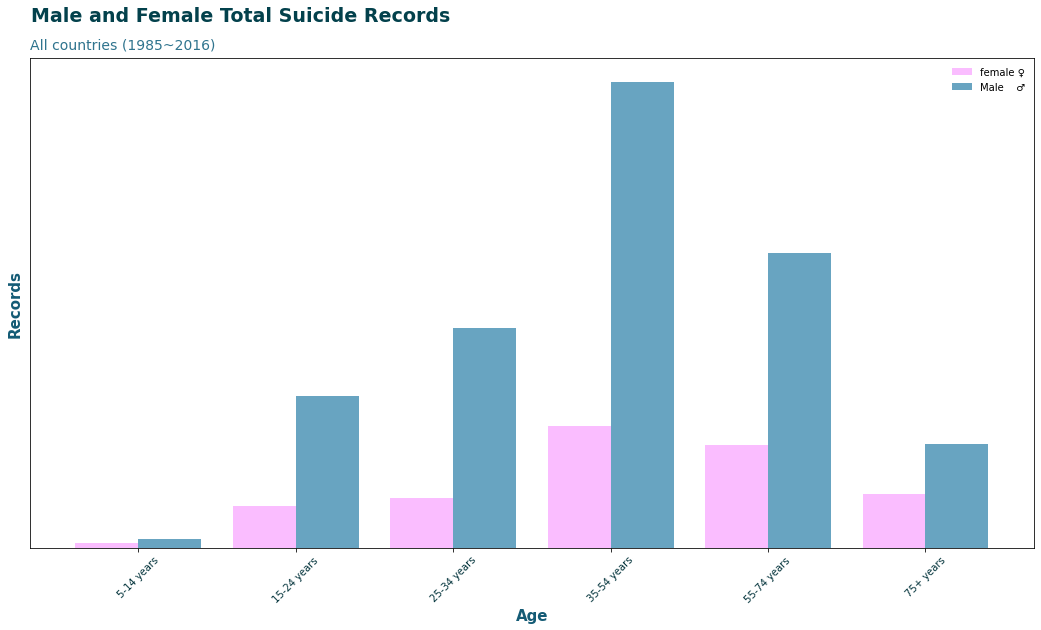

In [7]:
df_m=df[(df['sex']=='male')]
df_f=df[(df['sex']=='female')]


a=df_m[['age', 'suicides_no']].sort_values(by='age')
b=a.groupby(['age'], as_index=False).sum()
c=b.reindex([3,0,1,2,4,5])

d=df_f[['age', 'suicides_no']].sort_values(by='age')
e=d.groupby(['age'], as_index=False).sum()
w=e.reindex([3,0,1,2,4,5])

bins = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years', '75+ years']
female = w['suicides_no']
male = c['suicides_no']
x_axis = np.arange(len(bins))

# Creating two plots for male and female victims together for comparison porpuses.
f, ax = plt.subplots(figsize = (18, 9))
plt.bar(x_axis -0.2, female, width=0.4, label = 'Female', color='#FABDFF')
plt.bar(x_axis +0.2, male, width=0.4, label = 'Male', color='#68A4C1')

# Rotating the labels for readability
plt.xticks(x_axis, bins, rotation=45, color='#01323A')
plt.yticks(rotation=45, color='#01323A')

# Adding title, subtitle, labels and legends for easier and faster understanding
plt.title(
    "All countries (1985~2016)",
    fontsize=14,
    pad=10,
    loc="left",
    color='#2F748E'
)

plt.suptitle(
    "Male and Female Total Suicide Records",
    fontsize=19,
    fontweight='bold',
    x=0.126,
    y=0.96,
    ha="left",
    color='#03414C'
)
plt.xlabel('Age', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Records',
          fontsize=15,
          fontweight='bold',
          color='#145B75')

plt.yticks([])
plt.legend(["female ♀", "Male    ♂"], frameon=False)

plt.show()

Well it seems that there was a high increase of suicide cases for more than 10 years since 1985 til around 1998 by almost 150%, and then a stable phase together with with an slight decrease in records until 2013, but a sudden huge decrease records by late 2014 and 2015 which seems an unusual phenomenon, and surely needs to investigate further that if there is something missing in our dataset or if it is the true record what is the reason for that. 

Now lets see how is the suicide trends during the years for all the countries and all the genders years by year.

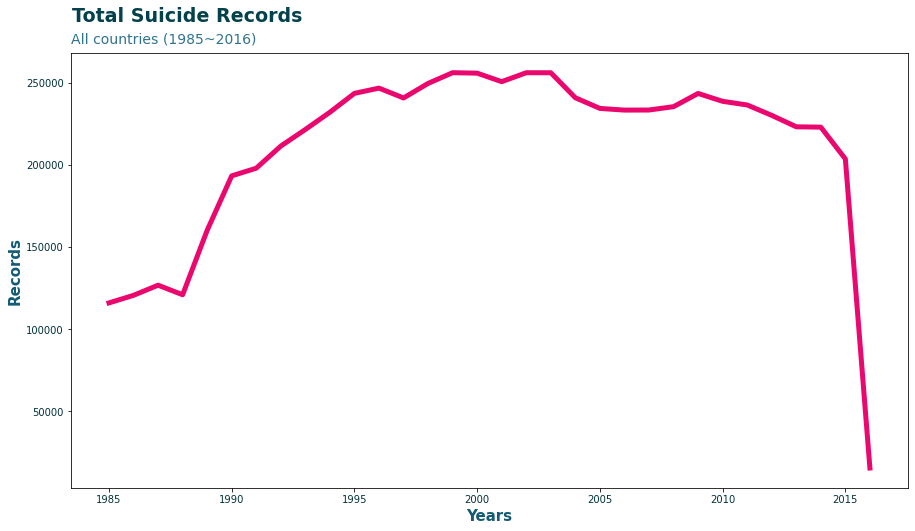

In [8]:
yr=df[['country', 'year', 'suicides_no']]
df_yr=yr.groupby(['year'], as_index=False).sum()
df_yr.plot(kind='line', x='year', y='suicides_no', figsize=(15, 8),linewidth=5, color='#EA086F')

# Rotating the labels for readability
plt.xticks(color='#01323A')
plt.yticks(color='#01323A')

# Adding title, subtitle, labels and legends for easier and faster understanding
plt.title(
    "All countries (1985~2016)",
    fontsize=14,
    pad=10,
    loc="left",
    color='#2F748E'
)

plt.suptitle(
    "Total Suicide Records",
    fontsize=19,
    fontweight='bold',
    x=0.126,
    y=0.96,
    ha="left",
    color='#03414C'
)
plt.xlabel('Years', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Records',
          fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.legend('', frameon=False)
plt.show()

Now lets sort the values by suicide numbers and see which countries has the most and the least cases.  
  We can see that the **highest** suicide case contries include:
1. Russia
2. United States
3. Japan
  
And the **lowest** case numbers are reported from:
1. Dominica
2. Saint Kitts
3. San Marino

In [9]:
sorted=df_gp.sort_values(by='suicides_no', ascending=False)

In [10]:
sorted.head(20)

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950
35,Germany,291262
73,Republic of Korea,261730
15,Brazil,226613
69,Poland,139098
97,United Kingdom,136805


And the countries with the lowest suicide records are shown below:

In [11]:
sorted.tail(30)

,country,suicides_no
7,Azerbaijan,1656
41,Iceland,1108
49,Kuwait,966
96,United Arab Emirates,622
56,Malta,585
72,Qatar,574
60,Montenegro,472
9,Bahrain,463
59,Mongolia,423
24,Cyprus,412


# Analyze


Now it's time to dig deeper and see what is relevant for suicides for those countries with highest number of records, and what is the reason of low suicide records in the countries with lowest suicide reports.

For this analysis I will verify results of four countries, two in each group of highest and lowest suicide records inluding:
* **Highest Suicide Records Group**
    * United States
    * Brazil
* **Lowest Suicide Records Group**
    * Qatar
    * Jamaica

In [12]:
ctr=df[(df['country']=='United States') | (df['country']=='Brazil') | (df['country']=='Qatar') | (df['country']=='Jamaica')]
ctr_a=ctr[['country', 'suicides_no']].groupby('country', as_index=False).sum().sort_values(by='suicides_no')
ctr_a.head()

,country,suicides_no
1,Jamaica,184
2,Qatar,574
0,Brazil,226613
3,United States,1034013


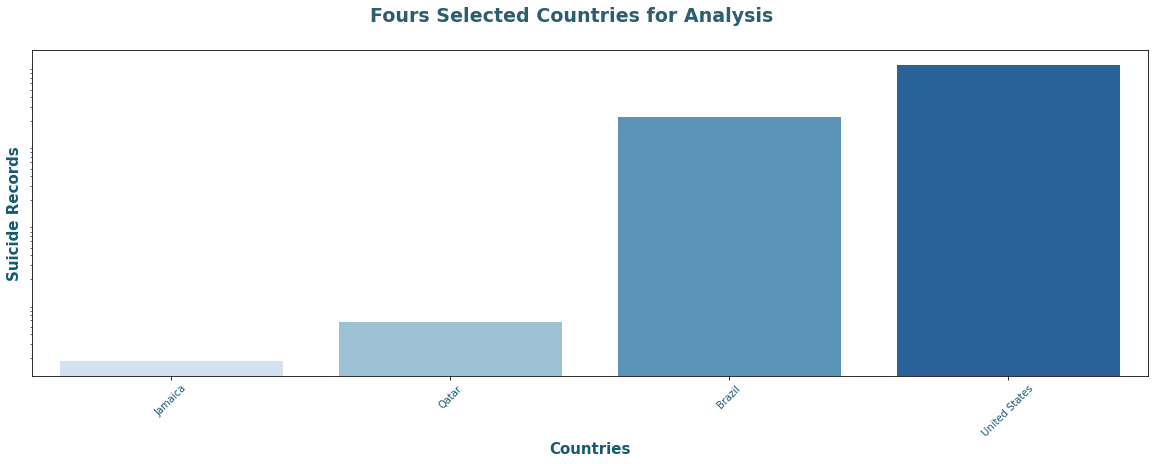

In [13]:
plt.figure(figsize=(20,6))
sns.barplot(x='country', y='suicides_no', data=ctr_a, palette='Blues')

plt.xticks(rotation=45, color='#145B75', ticks=None)
plt.yticks(rotation=45, color='#145B75')
plt.yscale('log')
plt.yticks([])

plt.legend('', frameon=False)

plt.xlabel('Countries', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Suicide Records',
          fontsize=15,
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Fours Selected Countries for Analysis",
    fontsize=19,
    fontweight='bold',
        ha="center",
    color='#2B5E71')

plt.show()

In [14]:
# Filtering df for US
us=df[(df['country']=='United States')]
us_m=us[(us['sex']=='male')]
us_f=us[(us['sex']=='female')]

# Filtering df for Brazil
br=df[(df['country']=='Brazil')]
br_m=br[(br['sex']=='male')]
br_f=br[(br['sex']=='female')]

# Filtering df for Jamaica
ja=df[(df['country']=='Jamaica')]
ja_m=ja[(ja['sex']=='male')]
ja_f=ja[(ja['sex']=='female')]

# Filtering df for Qatar
qt=df[(df['country']=='Qatar')]
qt_m=qt[(qt['sex']=='male')]
qt_f=qt[(qt['sex']=='female')]


We can see that there is a large gap between two countries in the lowest and those two in the highest suicide records groups.

Now let's take this into further analysis.

## Comparisons

I wonder if economic condition would have a strong relation (causation) to this phenomenon. So let's verify GDP per capita for each of these countries.

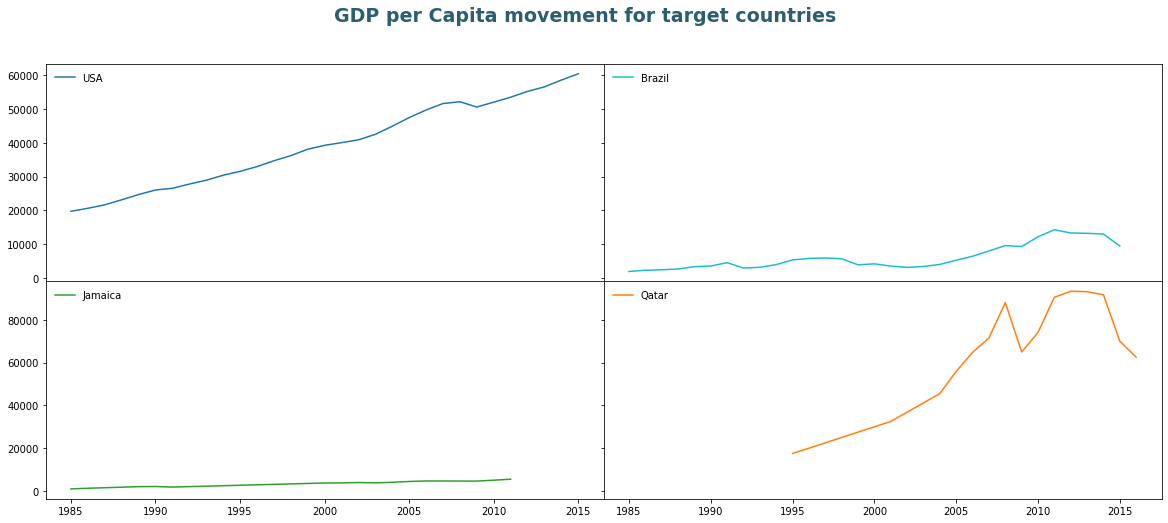

In [15]:
# Filtering dataset to see the economic movements per year for each country
us_nd=us.drop_duplicates(subset='year', keep='first')
us_yr=us_nd[['country', 'year', 'gdp_per_capita ($)', 'suicides_no']]

# For Brazil
br_nd=br.drop_duplicates(subset='year', keep='first')
br_yr=br_nd[['country', 'year', 'gdp_per_capita ($)', 'suicides_no']]

# For jamaica
ja_nd=ja.drop_duplicates(subset='year', keep='first')
ja_yr=ja_nd[['country', 'year', 'gdp_per_capita ($)', 'suicides_no']]

# For Qatar
qt_nd=qt.drop_duplicates(subset='year', keep='first')
qt_yr=qt_nd[['country', 'year', 'gdp_per_capita ($)', 'suicides_no']]


# Plot filtered dataset
fig = plt.figure(figsize=(20,8))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('GDP per Capita movement for target countries',
            fontsize=19,
            fontweight='bold',
            ha="center",
            color='#2B5E71')
ax1.plot(us_yr['year'], us_yr['gdp_per_capita ($)'], 'tab:blue', label='USA')
ax2.plot(br_yr['year'], br_yr['gdp_per_capita ($)'], 'tab:cyan', label='Brazil')
ax3.plot(ja_yr['year'], ja_yr['gdp_per_capita ($)'], 'tab:green', label='Jamaica')
ax4.plot(qt_yr['year'], qt_yr['gdp_per_capita ($)'], 'tab:orange', label='Qatar')


ax1.legend(frameon=False, loc='upper left')
ax2.legend(frameon=False, loc='upper left')
ax3.legend(frameon=False, loc='upper left')
ax4.legend(frameon=False, loc='upper left')

We can see the ecneconomic growth for two groups with highest and lowest suicide rates.

Now let's compare the gdp growth with suicide records movement.

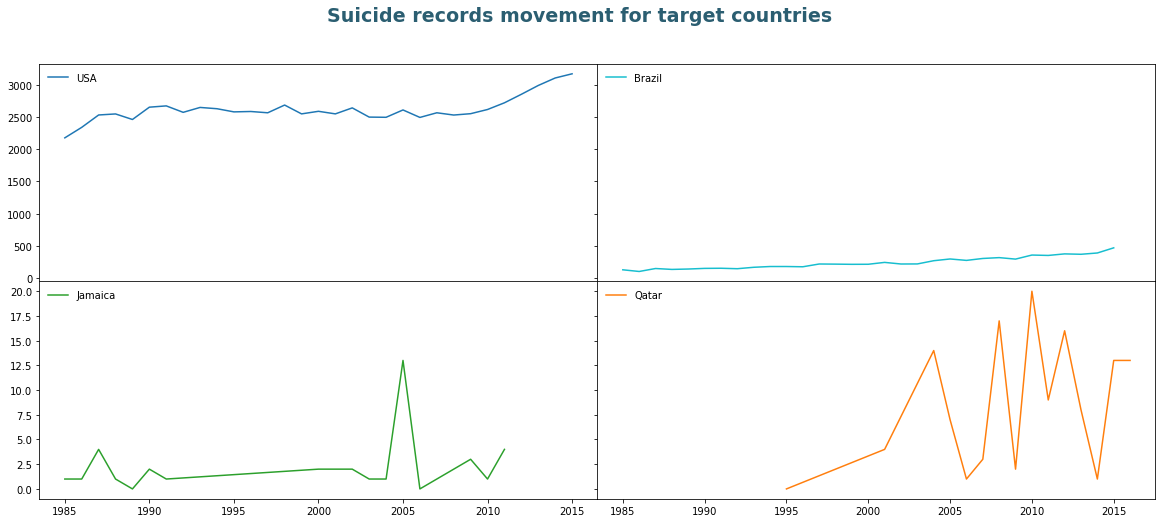

In [16]:
fig = plt.figure(figsize=(20,8))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')

fig.suptitle('Suicide records movement for target countries',
            fontsize=19,
            fontweight='bold',
            ha="center",
            color='#2B5E71')

ax1.plot(us_yr['year'], us_yr['suicides_no'], 'tab:blue', label='USA')
ax2.plot(br_yr['year'], br_yr['suicides_no'], 'tab:cyan', label='Brazil')
ax3.plot(ja_yr['year'], ja_yr['suicides_no'], 'tab:green', label='Jamaica')
ax4.plot(qt_yr['year'], qt_yr['suicides_no'], 'tab:orange', label='Qatar')

ax1.legend(frameon=False, loc='upper left')
ax2.legend(frameon=False, loc='upper left')
ax3.legend(frameon=False, loc='upper left')
ax4.legend(frameon=False, loc='upper left')

It's interesting, the economic growth for United States and Qatar and a stable and slow economic movement for Jamaica and Brazil is showing a total contrast for correlations with suicede records during the years for the two countries with highest suicides cases and the two with the lowest. 

## THe big drop

We already know that something happened around 2015 in which the suicide records dropped dramatically, so let's put it under microscope and search it further.

In [17]:
df_l=df[(df['year']>=2013)]
df_lc=df_l[['year', 'suicides_no', 'country', 'gdp_per_capita ($)']].groupby('year', as_index=False).sum()
df_lc

,year,suicides_no,gdp_per_capita ($)
0,2013,223199,26911368
1,2014,222984,25665252
2,2015,203640,19516008
3,2016,15603,4106420


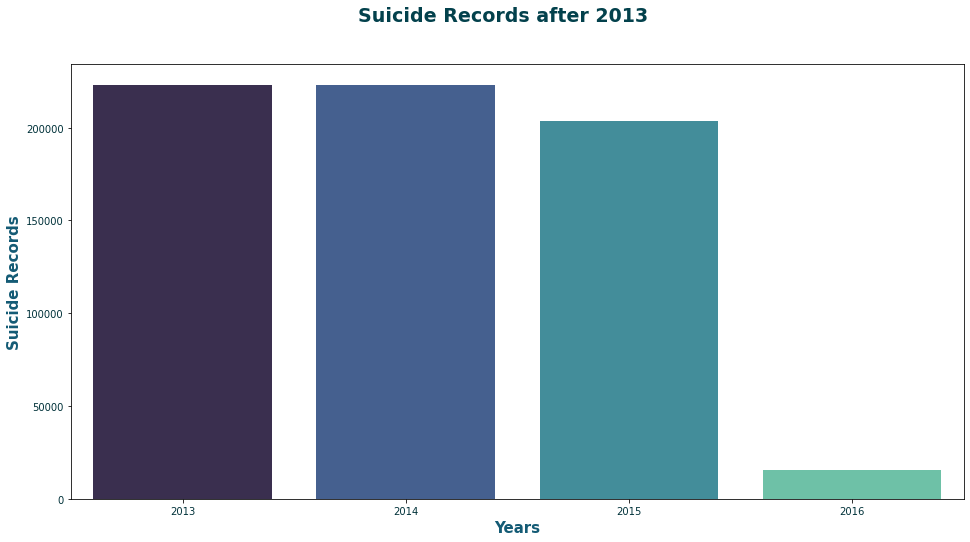

In [18]:
plt.subplots(figsize=(16, 8))
sns.barplot(data=df_lc, x='year', y='suicides_no', palette= 'mako')

# Rotating the labels for readability
plt.xticks(color='#01323A')
plt.yticks(color='#01323A')

# Adding title, subtitle, labels and legends for easier and faster understanding
plt.suptitle(
    "Suicide Records after 2013",
    fontsize=19,
    fontweight='bold',
    ha="center",
    color='#03414C')

plt.xlabel('Years', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Suicide Records',
          fontsize=15,
          fontweight='bold',
          color='#145B75')

plt.show()

Well, it seems that the suicide records begin falling largely by 2015 and almost decreased about 90% of it's records in 2016. There must be a reason for that, including the dataset error or lack of information in those years, so let's dive in it.

Well it seems that there is a lack of information and data inputs, so we need to complete this dataset with new and updated datasets.

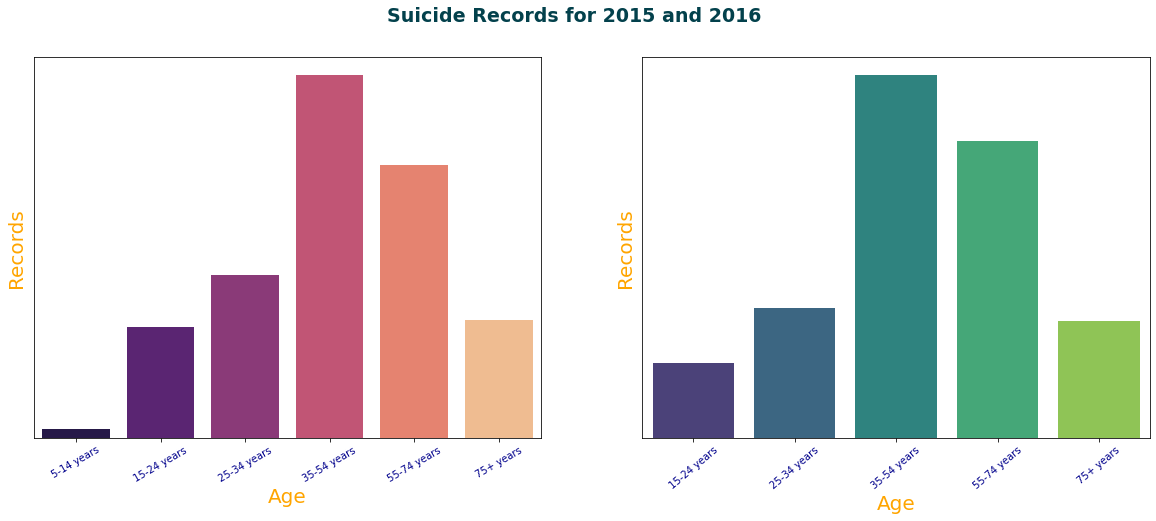

In [19]:
df_15=df[(df['year']==2015)]
df_15s=df_15[['country', 'year', 'age', 'suicides_no', 'gdp_per_capita ($)']].sort_values(by='age')
df_15sl=df_15s.groupby(['age'], as_index=False).sum()
df_15slx=df_15sl.reindex([3,0,1,2,4,5])

df_16=df[(df['year']==2016)]
df_16s=df_16[['country', 'year', 'age', 'suicides_no', 'gdp_per_capita ($)']].sort_values(by='age')
df_16sl=df_16s.groupby(['age'], as_index=False).sum()

s_x = [1,2,3,4,5]
plt.subplots(figsize=(20,7))
plt.subplot(1,2,1).set_ylabel("Y-Axis", fontsize = 20, color='purple')
g= sns.barplot(x='age', y='suicides_no', data=df_15slx, palette='magma')
g.set_xlabel("Age", fontsize = 20, color='orange')
g.set_ylabel("Records", fontsize = 20, color= 'orange')
g.set_xticklabels(g.get_xticklabels(),rotation = 30, color='darkblue')
g.set_yticks([])

plt.subplot(1,2,2).set_ylabel("Y-Axis", fontsize = 20, color='purple')
h= sns.barplot(x='age', y='suicides_no', data=df_16sl, palette='viridis')
h.set_xlabel("Age", fontsize = 20, color= 'orange')
h.set_ylabel("Records", fontsize = 20, color= 'orange')
h.set_xticklabels(h.get_xticklabels(),rotation = 40, color='darkblue')
h.set_yticks([])

# Rotating the labels for readability


# Adding title, subtitle, labels and legends for easier and faster understanding


plt.suptitle(
    "Suicide Records for 2015 and 2016",
    fontsize=19,
    fontweight='bold',
    ha="center",
    color='#03414C'
)


plt.show()

# Conclusion

Now that we analyzed almost all the useful values in this dataset we can release some recommendations as follows:


| Recommendation | Description |
|---| ---|
|1. Dataset Updates and Missinformations| This dataset have to be updated constantly since the values are recorded until 2016 and most importantly the valus after 2015 are not 100% complete and records have missing data or lack of addition inputs.**The suicide records have missing data or lack of addition inputs after 2015 and need to be replaced or overwrited with new or updated data.**
|2. Gender Bias| Based on our results we can see that almost all countries recorded suicides for male victims more than female victims, but according to WHO and other relevant organizations **there are some countries like Afghanistan, Sumali and others the number of suicides in female victims are higher than males and it has to be considered in the overal dataset** since the lack of these information would end up to bias in the researches |
|3. Children suicide records | There is a considerable number of suicide cases in **the age group of 5-14 years old victims** which is a real tragedy and is important to dive deeper and realize the root cause of this catastrophe, there are a lot of reasons that sould be considered before reaching out to any conclusions in this age group.|
|4. Root causes| Based on our results we can see that **public welfare and economic situations are not the best and the root cause for reaching out to any conclusion for suicide records at all**, there must be a lot of elements involving in this phenomenon. There must be focused research for the cause of the problems based on each regions, countries and age group with classifications of religions, races, economic, educational and psychological effects on the victims and possible victims in the future. |

  *<center>*As there is no further information about the participants, I assumed that all records were presented are balanced and not biased in this data set.*<center>

<div style="width:100%;text-align: center;"> <img align=middle src="https://st4.depositphotos.com/3001967/23998/i/600/depositphotos_239980626-stock-photo-man-passing-offering-helping-hand.jpg" alt="Suicide and mental pain" style="height:500px;margin-top:3rem;"> </div>

I will update this notebook with more data and updated dataset in the future and I hope it would help some research group or humanitary NGO for stepping towards minimizing and eliminating this human-being real tragedy.

We all deserve a normal life and we all deserve to be happy no matter what race, color, religion or nationality we have. You can find more information about *World Suicide Prevention Day* here in [this link](https://en.wikipedia.org/wiki/World_Suicide_Prevention_Day) of *Wikipedia*, also step forward to do something about comforting other human beings and make each other smile.

This project has been done by [Yousef Moterassed](https://www.kaggle.com/yousefmoterassed) and is dedicated for **World Suicide Prevention Day**, and is available through [Kaggle](https://www.kaggle.com/yousefmoterassed), [GitHub](https://github.com/Persabras), [my website](https://yousefmoterassed.wixsite.com/profile) and [LinkedIn](https://www.linkedin.com/in/yousef-moterassed/).

With all the love and respect
***
[**Yousef Moterassed**](https://www.kaggle.com/yousefmoterassed)  
  September 2022, Brazil  
  [LinkedIn](https://www.linkedin.com/in/yousef-moterassed/)